# STEP 0: *Loading data*

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the data

In [2]:
file_path = './Sleep_Efficiency.csv'
data_frame = pd.read_csv(file_path)
print(data_frame.tail())

      ID  Age  Gender              Bedtime          Wakeup time  \
447  448   27  Female  2021-11-13 22:00:00  2021-11-13 05:30:00   
448  449   52    Male  2021-03-31 21:00:00  2021-03-31 03:00:00   
449  450   40  Female  2021-09-07 23:00:00  2021-09-07 07:30:00   
450  451   45    Male  2021-07-29 21:00:00  2021-07-29 04:00:00   
451  452   18    Male  2021-03-17 02:30:00  2021-03-17 10:00:00   

     Sleep duration  Sleep efficiency  REM sleep percentage  \
447             7.5              0.91                    22   
448             6.0              0.74                    28   
449             8.5              0.55                    20   
450             7.0              0.76                    18   
451             7.5              0.63                    22   

     Deep sleep percentage  Light sleep percentage  Awakenings  \
447                     57                      21         0.0   
448                     57                      15         4.0   
449                 

Preliminary Plots

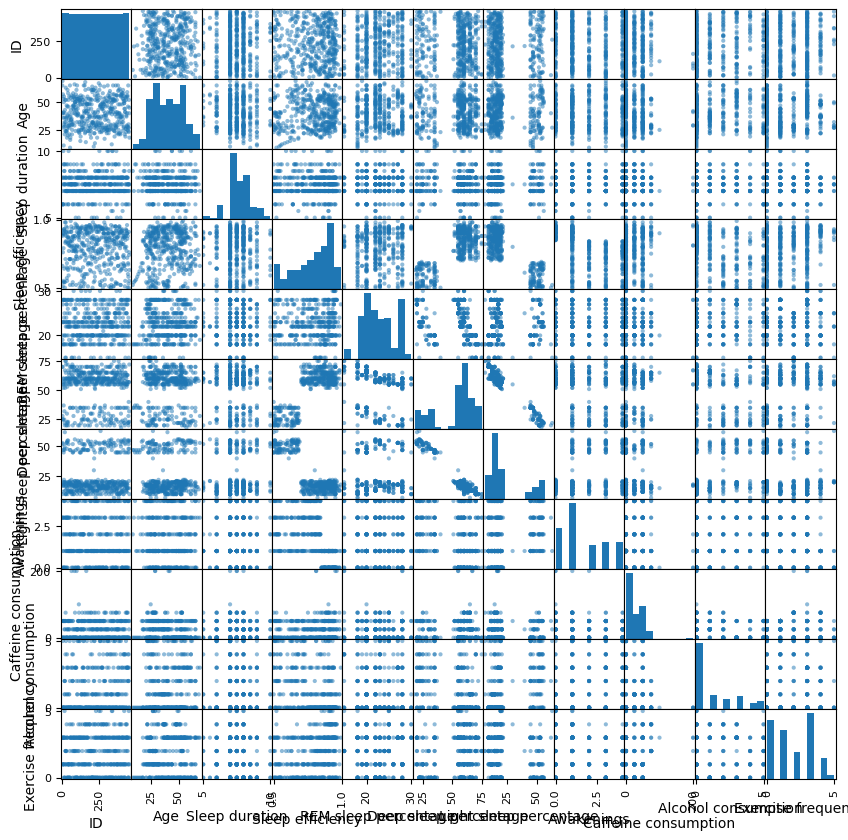

In [3]:

# Generate scatter plots for all pairs of variables
pd.plotting.scatter_matrix(data_frame, figsize=(10, 10))
plt.show()

In [4]:
# Description
data_frame.describe()

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,438.000000,446.000000
mean,226.500000,40.285398,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,1.791480
std,130.625419,13.172250,0.866625,0.135237,3.525963,15.654235,15.313665,1.356762,30.202785,1.621377,1.428134
min,1.000000,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,113.750000,29.000000,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,226.500000,40.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,2.000000
75%,339.250000,52.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,3.000000
max,452.000000,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000


Plotting the correlation matrix

Plotting Failed hence the data is not clean.

# STEP 1: *Data Cleaning*
Before proceeding with data analysis, it's crucial to clean and preprocess your data. This involves handling missing values, dealing with outliers, and ensuring data consistency. Cleaning your dataset will help you obtain more accurate and reliable results during analysis.

In [5]:
data_frame.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


Finding null rows using the `isna()` or `isnull()` function

In [6]:
na_rows = data_frame[data_frame.isna().any(axis=1)]
print(na_rows)

      ID  Age  Gender              Bedtime          Wakeup time  \
5      6   36  Female  2021-07-01 21:00:00  2021-07-01 04:30:00   
19    20   52    Male  2021-12-03 00:30:00  2021-12-03 07:30:00   
20    21   24    Male  2021-05-02 00:00:00  2021-05-02 08:00:00   
24    25   24    Male  2021-09-16 00:00:00  2021-09-16 07:00:00   
26    27   36  Female  2021-06-18 00:00:00  2021-06-18 07:00:00   
..   ...  ...     ...                  ...                  ...   
434  435   28  Female  2021-08-11 23:00:00  2021-08-11 07:00:00   
440  441   28  Female  2021-02-06 21:00:00  2021-02-06 05:00:00   
442  443   27  Female  2021-02-06 01:30:00  2021-02-06 08:30:00   
446  447   23    Male  2021-04-21 00:00:00  2021-04-21 07:00:00   
449  450   40  Female  2021-09-07 23:00:00  2021-09-07 07:30:00   

     Sleep duration  Sleep efficiency  REM sleep percentage  \
5               7.5              0.90                    23   
19              7.0              0.89                    28   
20    

**Removing the NaN rows**

In [8]:
data_frame.dropna(inplace = True)
print(data_frame)

      ID  Age  Gender              Bedtime          Wakeup time  \
0      1   65  Female  2021-03-06 01:00:00  2021-03-06 07:00:00   
1      2   69    Male  2021-12-05 02:00:00  2021-12-05 09:00:00   
2      3   40  Female  2021-05-25 21:30:00  2021-05-25 05:30:00   
3      4   40  Female  2021-11-03 02:30:00  2021-11-03 08:30:00   
4      5   57    Male  2021-03-13 01:00:00  2021-03-13 09:00:00   
..   ...  ...     ...                  ...                  ...   
445  446   30  Female  2021-11-16 23:00:00  2021-11-16 06:30:00   
447  448   27  Female  2021-11-13 22:00:00  2021-11-13 05:30:00   
448  449   52    Male  2021-03-31 21:00:00  2021-03-31 03:00:00   
450  451   45    Male  2021-07-29 21:00:00  2021-07-29 04:00:00   
451  452   18    Male  2021-03-17 02:30:00  2021-03-17 10:00:00   

     Sleep duration  Sleep efficiency  REM sleep percentage  \
0               6.0              0.88                    18   
1               7.0              0.66                    19   
2     

In [9]:
data_frame.corr()

C:\Users\dell\AppData\Local\Temp\ipykernel_13716\3812265915.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_frame.corr()


,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
ID,1.000000,0.012011,0.030504,0.025931,0.086319,-0.015469,-0.003608,-0.084746,-0.056247,0.089620,0.009799
Age,0.012011,1.000000,-0.065951,0.124093,0.015449,0.058156,-0.062613,-0.004006,-0.169057,0.069295,0.071241
Sleep duration,0.030504,-0.065951,1.000000,-0.019164,-0.015408,-0.035477,0.039536,-0.009162,-0.030922,-0.048436,-0.046671
Sleep efficiency,0.025931,0.124093,-0.019164,1.000000,0.064038,0.789087,-0.816934,-0.567885,0.070804,-0.397012,0.266050
REM sleep percentage,0.086319,0.015449,-0.015408,0.064038,1.000000,-0.185850,-0.035046,-0.024608,0.113965,-0.039597,0.044200
Deep sleep percentage,-0.015469,0.058156,-0.035477,0.789087,-0.185850,1.000000,-0.975461,-0.327284,-0.024522,-0.374614,0.171841
Light sleep percentage,-0.003608,-0.062613,0.039536,-0.816934,-0.035046,-0.975461,1.000000,0.338397,-0.000596,0.389895,-0.184684
Awakenings,-0.084746,-0.004006,-0.009162,-0.567885,-0.024608,-0.327284,0.338397,1.000000,-0.112922,0.210017,-0.231464
Caffeine consumption,-0.056247,-0.169057,-0.030922,0.070804,0.113965,-0.024522,-0.000596,-0.112922,1.000000,-0.097674,-0.082661
Alcohol consumption,0.089620,0.069295,-0.048436,-0.397012,-0.039597,-0.374614,0.389895,0.210017,-0.097674,1.000000,0.004215


## Key Insights

1. Hypothesis: Age and Sleep efficiency are positively correlated. (Counterintuitive)
    Justification: The correlation coefficient between Age and Sleep efficiency is 0.124093, indicating a weak positive correlation.

2. Hypothesis: Sleep duration and Sleep efficiency are negatively correlated. 
    Justification: The correlation coefficient between Sleep duration and Sleep efficiency is -0.019164, suggesting a weak negative correlation.

3. Hypothesis:  p percentage and Sleep efficiency are positively correlated.
    Justification: The correlation coefficient between Deep sleep percentage and Sleep efficiency is 0.789087, indicating a strong positive correlation.

4. Hypothesis: Light sleep percentage and Sleep efficiency are negatively correlated.
    Justification: The correlation coefficient between Light sleep percentage and Sleep efficiency is -0.816934, suggesting a strong negative correlation.

5. Hypothesis: Awakenings and Sleep efficiency are negatively correlated.
    Justification: The correlation coefficient between Awakenings and Sleep efficiency is -0.567885, indicating a moderate negative correlation.